<a href="https://colab.research.google.com/github/JohanPP24/UAS-AI/blob/main/EDA_Klasifikasi_Obesitas_menggunakan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA Klasifikasi Obesitas menggunakan KNN**



**Dibuat oleh :**                                   

**Nama : Johan Putra Pradana**

**NIM : 312110314**

**Kelas : TI.21.B.SE2**

**Prodi : Teknik Infomatika**     


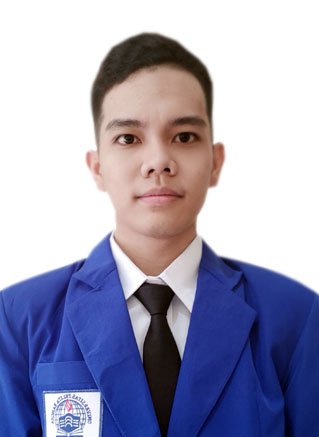


# **Memuat dan Menampilkan Dataset Klasifikasi Obesitas**

In [ ]:
# Mengimpor pustaka yang diperlukan
import pandas as pd

# Menentukan URL file dataset
dataset_file = "https://github.com/JohanPP24/UAS-AI/raw/9ade5ef90f2fa74e56cbede6e125f9d164a5845b/%E2%80%9Cdataset/Obesity%20Classification.csv"

# Memuat dataset ke dalam DataFrame pandas
data = pd.read_csv(dataset_file)

# Menampilkan 5 baris pertama dari dataset
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


# **Mengecek Duplikasi pada Dataset**

In [ ]:
# Mengecek jumlah baris yang memiliki duplikasi dalam dataset
print(f"Terdapat data duplikasi sebanyak {data.duplicated().sum()} baris")

Terdapat data duplikasi sebanyak 0 baris


# **Mengecek Nilai Kosong pada Dataset**

In [ ]:
# Mengecek jumlah nilai kosong (NaN) pada setiap kolom dalam dataset
data.isna().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


# **Mengecek Data yang Paling Sering Muncul pada Kolom Kategori**

In [ ]:
#Imputasi data kategori yaitu kolom 'Label'
#Cek data yang paling sering muncul
data.Label.value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


# **Imputasi Data Kategori pada Kolom 'Label' dengan Nilai yang Paling Sering Muncul**

In [ ]:
# Mengisi nilai kosong pada kolom 'Label' dengan kategori yang paling sering muncul, yaitu 'Underweight'
data.loc[:, 'Label'] = data['Label'].fillna('Underweight')


# **Cek Kembali Data Kosong Setelah Proses Imputasi**

In [ ]:
# Mengecek kembali jumlah nilai kosong (NaN) di setiap kolom setelah proses imputasi
data.isna().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


# **Menentukan data target dan feature**

# **Menampilkan 5 Baris Pertama Data**

In [ ]:
# Menampilkan 5 baris pertama dari dataset untuk melihat struktur data setelah dilakukan perubahan
data.head()


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


# **Target dan Features**

In [ ]:
# Target (label yang ingin diprediksi): 'Label'
# Features (fitur yang digunakan untuk prediksi) : Age, Gender,'Height, Weight, BMI

# **Menganalisa data Target**

# **Menghitung Frekuensi Setiap Kategori pada Kolom 'Label'**

In [ ]:
# Menghitung dan menampilkan jumlah kemunculan setiap kategori pada kolom 'Label'
data.Label.value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


# **Visualisasi Distribusi Usia Berdasarkan Kategori Obesitas**

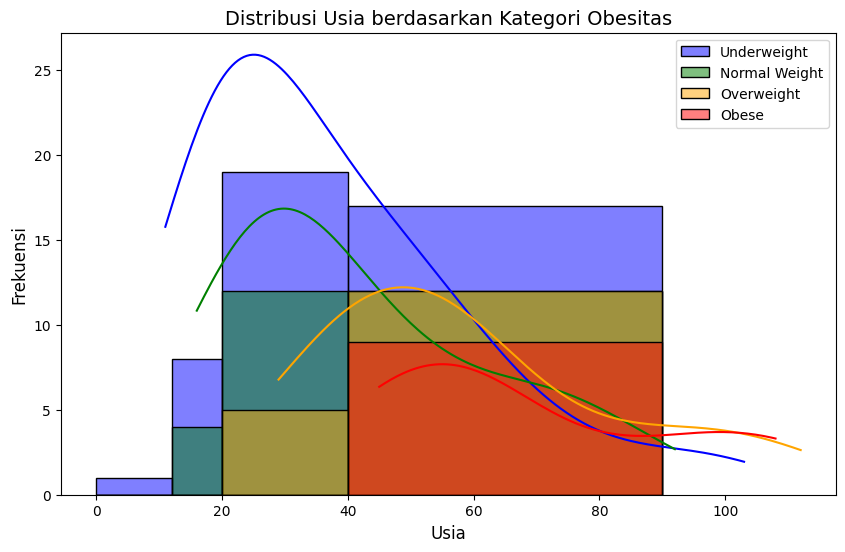

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat visualisasi distribusi usia berdasarkan kategori obesitas (Label)
plt.figure(figsize=(10, 6))

# Histogram untuk kategori "Underweight"
sns.histplot(data.Age[data.Label == 'Underweight'],
             bins=[0, 12, 20, 40, 90],
             color='blue',
             label='Underweight',
             kde=True)

# Histogram untuk kategori "Normal Weight"
sns.histplot(data.Age[data.Label == 'Normal Weight'],
             bins=[0, 12, 20, 40, 90],
             color='green',
             label='Normal Weight',
             kde=True)

# Histogram untuk kategori "Overweight"
sns.histplot(data.Age[data.Label == 'Overweight'],
             bins=[0, 12, 20, 40, 90],
             color='orange',
             label='Overweight',
             kde=True)

# Histogram untuk kategori "Obese"
sns.histplot(data.Age[data.Label == 'Obese'],
             bins=[0, 12, 20, 40, 90],
             color='red',
             label='Obese',
             kde=True)

# Menambahkan judul dan label
plt.title('Distribusi Usia berdasarkan Kategori Obesitas', fontsize=14)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()
plt.show()

# **Visualisasi Distribusi BMI Berdasarkan Kategori Obesitas**

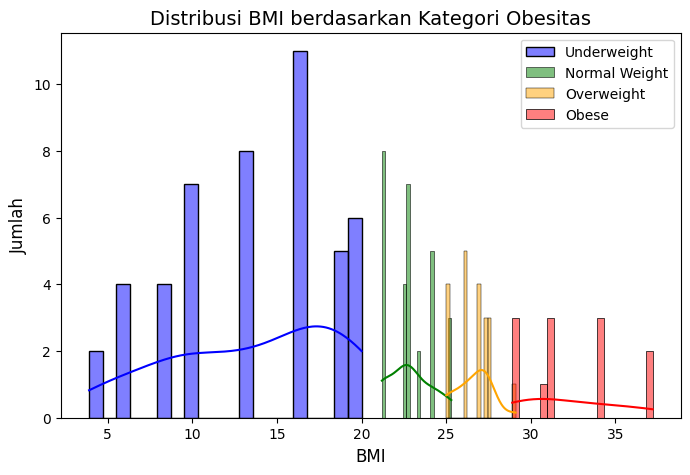

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat visualisasi distribusi BMI berdasarkan kategori obesitas (Label)
plt.figure(figsize=(8, 5))

# Histogram untuk kategori "Underweight"
sns.histplot(data.BMI[data.Label == 'Underweight'],
             bins=20,
             color='blue',
             label='Underweight',
             kde=True)

# Histogram untuk kategori "Normal Weight"
sns.histplot(data.BMI[data.Label == 'Normal Weight'],
             bins=20,
             color='green',
             label='Normal Weight',
             kde=True)

# Histogram untuk kategori "Overweight"
sns.histplot(data.BMI[data.Label == 'Overweight'],
             bins=20,
             color='orange',
             label='Overweight',
             kde=True)

# Histogram untuk kategori "Obese"
sns.histplot(data.BMI[data.Label == 'Obese'],
             bins=20,
             color='red',
             label='Obese',
             kde=True)

# Menambahkan judul dan label
plt.title('Distribusi BMI berdasarkan Kategori Obesitas', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend()
plt.show()

# **Visualisasi Distribusi Kategori Berdasarkan Label Obesitas**

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label', 'Age Group',
       'Height Group', 'Weight Group', 'BMI Category'],
      dtype='object')


<ipython-input-23-dd5bad70e904>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)  # Rotasi agar teks tidak bertumpuk
<ipython-input-23-dd5bad70e904>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)  # Rotasi agar teks tidak bertumpuk
<ipython-input-23-dd5bad70e904>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)  # Rotasi agar teks tidak bertumpuk
<ipython-input-23-dd5bad70e904>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)  # Rotasi ag

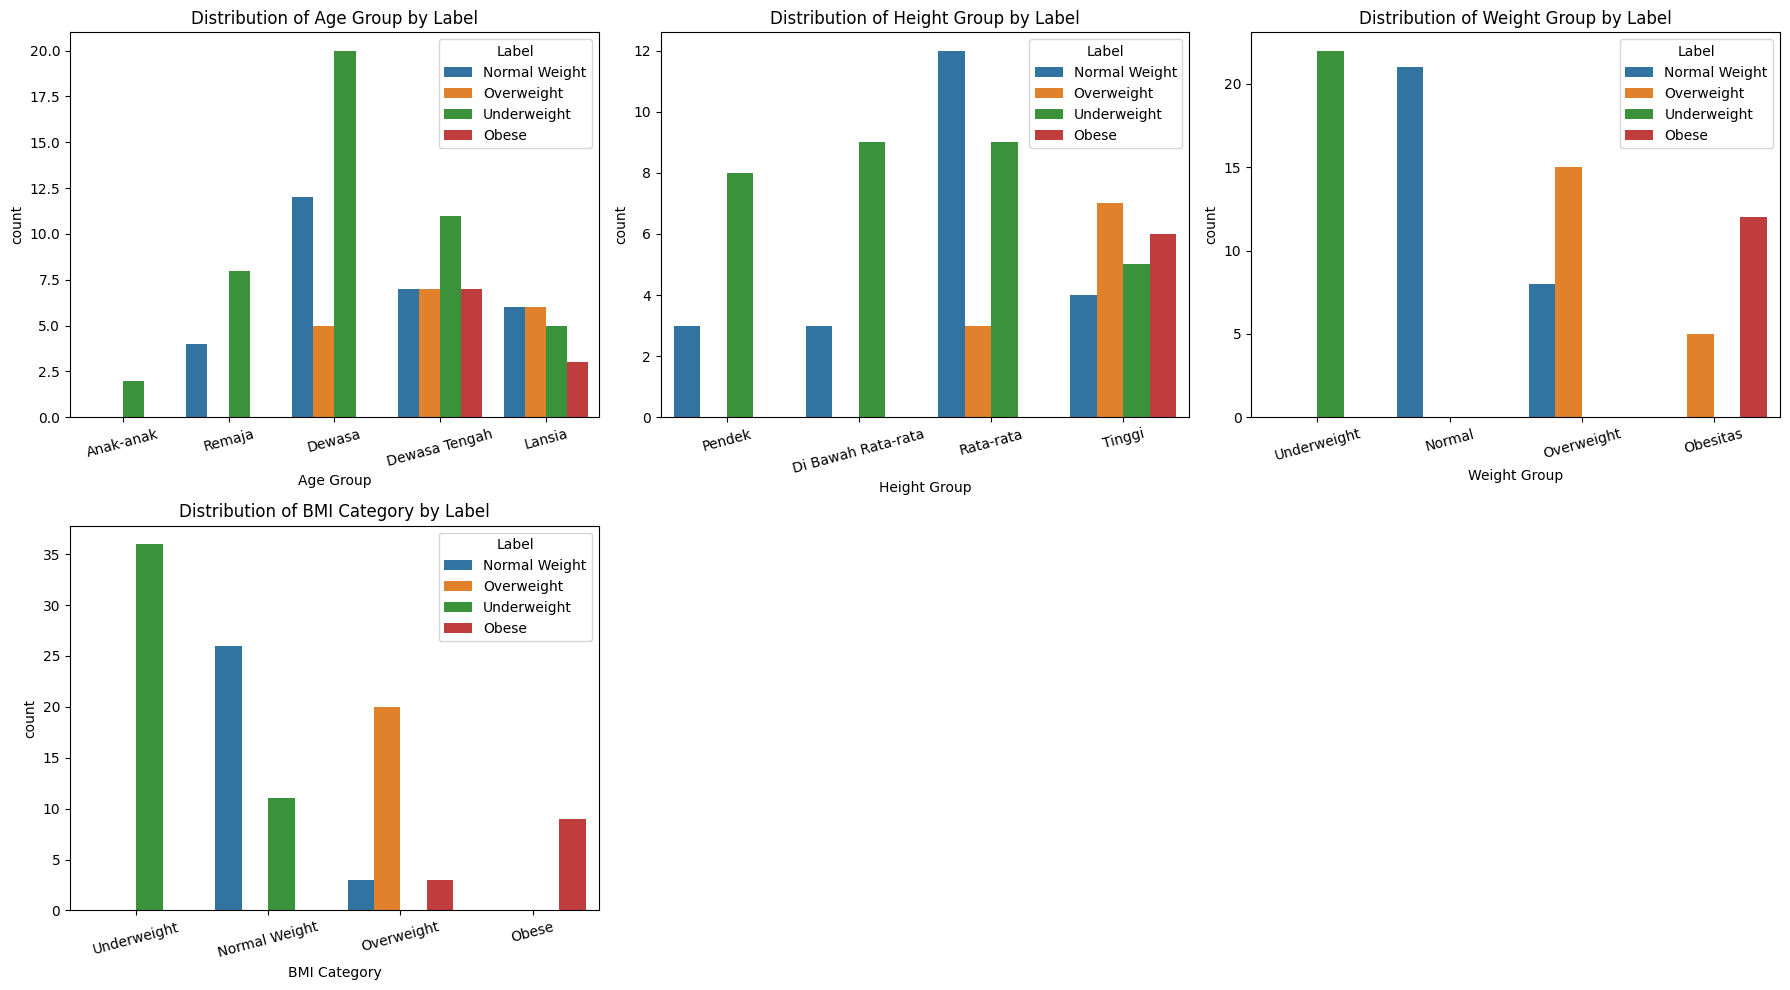

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan kolom-kolom ada
print(data.columns)  # Untuk memeriksa kolom yang ada di dataset

# Menentukan fitur kategorikal yang relevan
cate_cols = ['Age Group', 'Height Group', 'Weight Group', 'BMI Category']

# Membuat kategori tambahan jika belum ada
if 'Age Group' not in data.columns:
    data['Age Group'] = pd.cut(data['Age'], bins=[0, 12, 20, 40, 60, 100],
                               labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior'])

if 'Height Group' not in data.columns:
    data['Height Group'] = pd.cut(data['Height'], bins=[140, 155, 170, 185, 200],
                                  labels=['Short', 'Below Average', 'Average', 'Tall'])

if 'Weight Group' not in data.columns:
    data['Weight Group'] = pd.cut(data['Weight'], bins=[30, 50, 70, 90, 120],
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

if 'BMI Category' not in data.columns:
    data['BMI Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                                  labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

# Membuat subplots untuk setiap kategori
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 baris, 3 kolom
axs = axs.flatten()  # Meratakan array subplot agar mudah diiterasi

# Membuat countplot untuk setiap fitur kategorikal
for col, ax in zip(cate_cols, axs):
    sns.countplot(data=data, x=col, hue='Label', ax=ax)
    ax.set_title(f'Distribution of {col} by Label')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)  # Rotasi agar teks tidak bertumpuk

# Hapus subplot kosong jika jumlah kategori < jumlah subplot
for i in range(len(cate_cols), len(axs)):
    fig.delaxes(axs[i])

# Menyesuaikan layout
plt.tight_layout()
plt.show()
